In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [10]:
#scaling x value
x_train = x_train/255
x_test = x_test/255

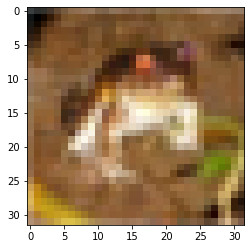

In [14]:
plt.imshow(x_train[0])

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_trainCat = to_categorical(y_train,10)
y_testCat = to_categorical(y_test,10)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

#Convualtional and Pooling Layer 1
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convualtional and Pooling Layer 2
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Flattening Layer
model.add(Flatten())

#Dense Layer
model.add(Dense(256,activation='relu'))

#Output Layer
model.add(Dense(10,activation='softmax'))

#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

In [31]:
model.fit(x=x_train,y=y_trainCat,epochs=20, validation_data=(x_test,y_testCat), callbacks=[early_stopping])

Epoch 1/20
1563/1563 [==============================] - 91s 59ms/step - loss: 1.5014 - accuracy: 0.4589 - val_loss: 1.2676 - val_accuracy: 0.5519
Epoch 2/20
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1852 - accuracy: 0.5795 - val_loss: 1.1284 - val_accuracy: 0.6019
Epoch 3/20
1563/1563 [==============================] - 82s 52ms/step - loss: 1.0324 - accuracy: 0.6353 - val_loss: 1.0590 - val_accuracy: 0.6308
Epoch 4/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9220 - accuracy: 0.6771 - val_loss: 1.0329 - val_accuracy: 0.6374
Epoch 5/20
1563/1563 [==============================] - 85s 54ms/step - loss: 0.8324 - accuracy: 0.7087 - val_loss: 0.9582 - val_accuracy: 0.6746
Epoch 6/20
1563/1563 [==============================] - 82s 53ms/step - loss: 0.7518 - accuracy: 0.7352 - val_loss: 1.0362 - val_accuracy: 0.6503


In [32]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.501433,0.45894,1.267572,0.5519
1,1.185159,0.57950,1.128387,0.6019
2,1.032408,0.63528,1.059004,0.6308
3,0.921982,0.67714,1.032946,0.6374
4,0.832444,0.70866,0.958174,0.6746
5,0.751777,0.73520,1.036206,0.6503


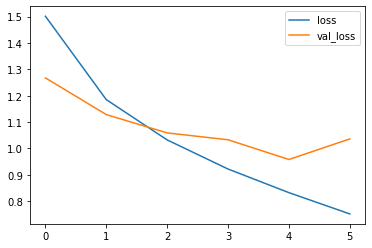

In [33]:
losses[['loss','val_loss']].plot()

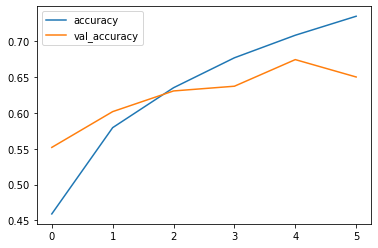

In [35]:
losses[['accuracy','val_accuracy']].plot()

In [36]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[794  29  54  10  10   3  12   3  68  17]
 [ 46 797  23   9   4   5  19   2  30  65]
 [ 93   7 667  37  25  67  62  19  19   4]
 [ 36  15 149 375  50 197 110  32  21  15]
 [ 52   3 236  49 401  50 110  69  23   7]
 [ 26   7 143 122  23 583  44  37   8   7]
 [ 10  13 100  30  13  20 792   8  12   2]
 [ 47   7  84  36  26  92  23 666   6  13]
 [101  49  25  15   3   9   3   2 781  12]
 [ 74 146  26  15   7  12  12  17  44 647]]


              precision    recall  f1-score   support

           0       0.62      0.79      0.70      1000
           1       0.74      0.80      0.77      1000
           2       0.44      0.67      0.53      1000
           3       0.54      0.38      0.44      1000
           4       0.71      0.40      0.51      1000
           5       0.56      0.58      0.57      1000
           6       0.67      0.79      0.72      1000
           7       0.78      0.67      0.72      1000
           8       0.77      0.78      0.78      1000
           9       0.82   

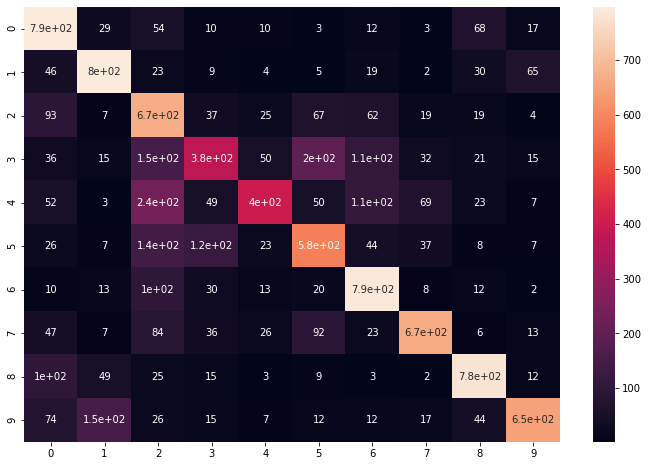

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [47]:
x_true = x_test[27]

In [48]:
model.predict_classes(x_true.reshape(1,32,32,3))[0]

0

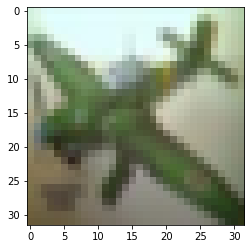

In [49]:
plt.imshow(x_true)